In [58]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import mglearn
%matplotlib inline
import seaborn as sns
import platform
from matplotlib import font_manager , rc

if platform.system() == 'Darwin':
  rc('font' , family = 'AppleGothic')
elif platform.system() == 'Windows':
  path = 'C:/Windows/Fonts/malgun.ttf'
  font_name = font_manager.FontProperties(fname = path).get_name()
  rc('font' , family = font_name)
else:
  print('모름')
plt.rcParams['axes.unicode_minus'] = False
import warnings
warnings.filterwarnings('ignore')

In [59]:
pd.read_csv('housing.csv')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [60]:
import os

In [61]:
import os
project_root_dir = '.'
chapter_id = '프로젝트 진행 절차'
images_path = os.path.join(project_root_dir , 'images',chapter_id)
os.makedirs(images_path , exist_ok = True)

def save_fig(fig_id , tight_layout = True , fig_extension = 'png' , resolution = 300):
    path = os.path.join(images_path , fig_id + '.' + fig_extension)
    print('그림 저장 : ' , fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path , format = fig_extension , dpi = resolution)

# 데이터 가져오기

In [62]:
import os
import tarfile
import urllib.request

download_root = 'https://raw.githubusercontent.co/rickiepark/handson-ml2/master/'
housing_path = os.path.join('datasets','housing')
housing_url = download_root + 'dataests/housing/housing.tga'

def fetch_housing_data(housing_url = housing_url , housing_path = housing_path):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    else:
        tgz_path = os.path.join(housing_path , 'housing.tga')
        urllib.request.urlretrieve(housing_url , tgz_path)
        housing_tgz = tarfile.open(tgz_path)
        housing_tgz.extractall(path = housing_path)
        housing_tgz.close()

In [63]:
fetch_housing_data()

ReadError: file could not be opened successfully

In [64]:
def load_housing_data(housing_path = housing_path):
    csv_path = os.path.join(housing_path , 'housing.csv')
    return pd.read_csv(csv_path)

In [65]:
housing = load_housing_data()
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


- 캘리포니아 지역의 주택의 특성을 사용해 중간 가격을 예측하는 문제

In [66]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [67]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

- 다중회귀 : 예측에 사용할 특성이 여러 개 존재

In [68]:
housing.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


그림 저장 :  feature_hist_plot


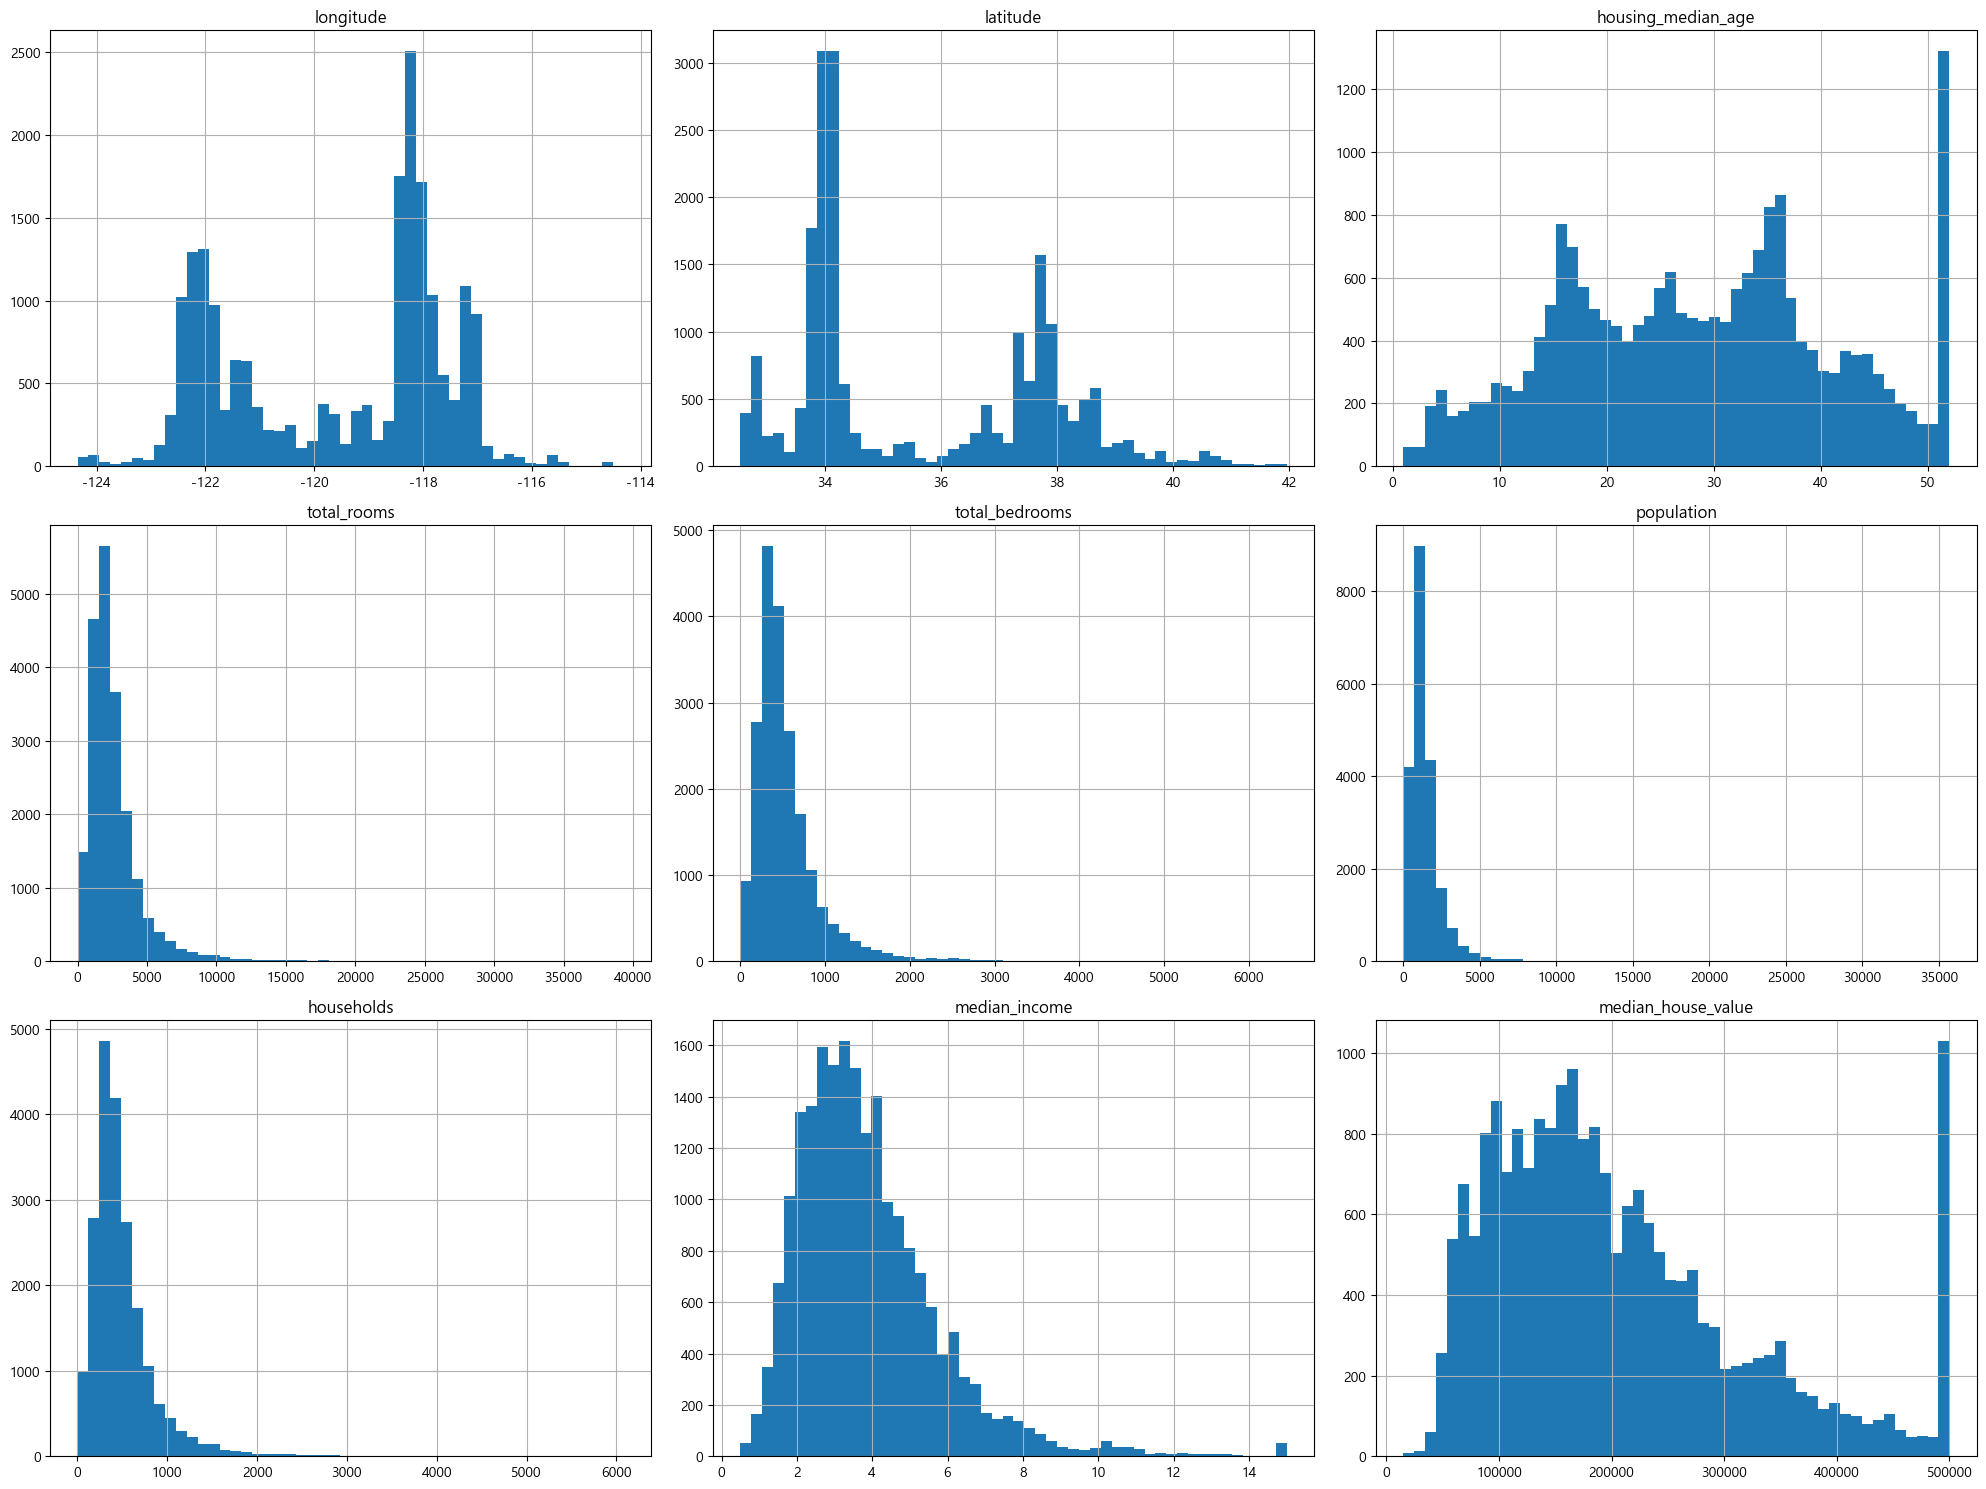

In [69]:
housing.hist(bins = 50 , figsize = (20,15))
save_fig('feature_hist_plot' , tight_layout = True , fig_extension = 'png' , resolution = 300)
plt.show()

In [70]:
# 노트북의 실행 결과를 동일하게 하려면
np.random.seed(42)

In [71]:
def split_train_test(data , test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices] , data.iloc[test_indices]

In [72]:
train_set , test_set = split_train_test(housing , 0.2)

In [73]:
train_set.shape

(16512, 10)

In [74]:
from sklearn.model_selection import train_test_split
train_set , test_set = train_test_split(housing , test_size = 0.2 , random_state = 42)
train_set.shape , test_set.shape

((16512, 10), (4128, 10))

In [75]:
housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Text(0, 0.5, '위도')

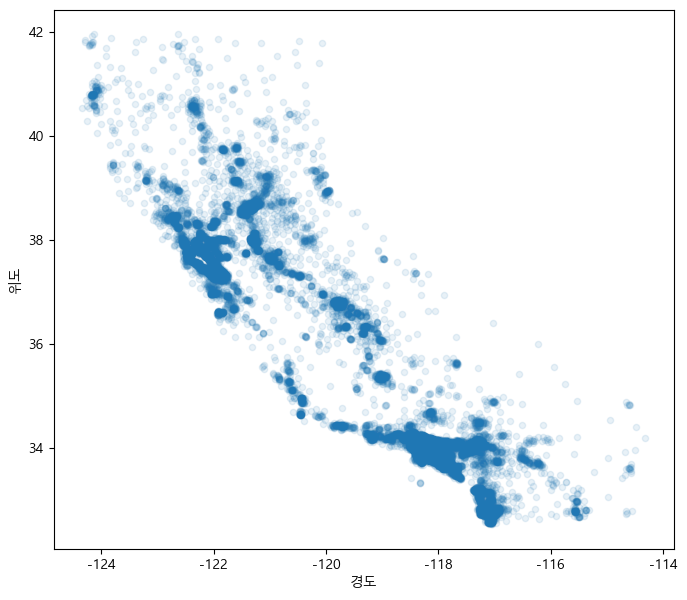

In [76]:
housing.plot(kind = 'scatter' , x = 'longitude' , y = 'latitude' , figsize = (8,7) , alpha = 0.1)
plt.xlabel('경도')
plt.ylabel('위도')

그림 저장 :  housing_prices_scatter


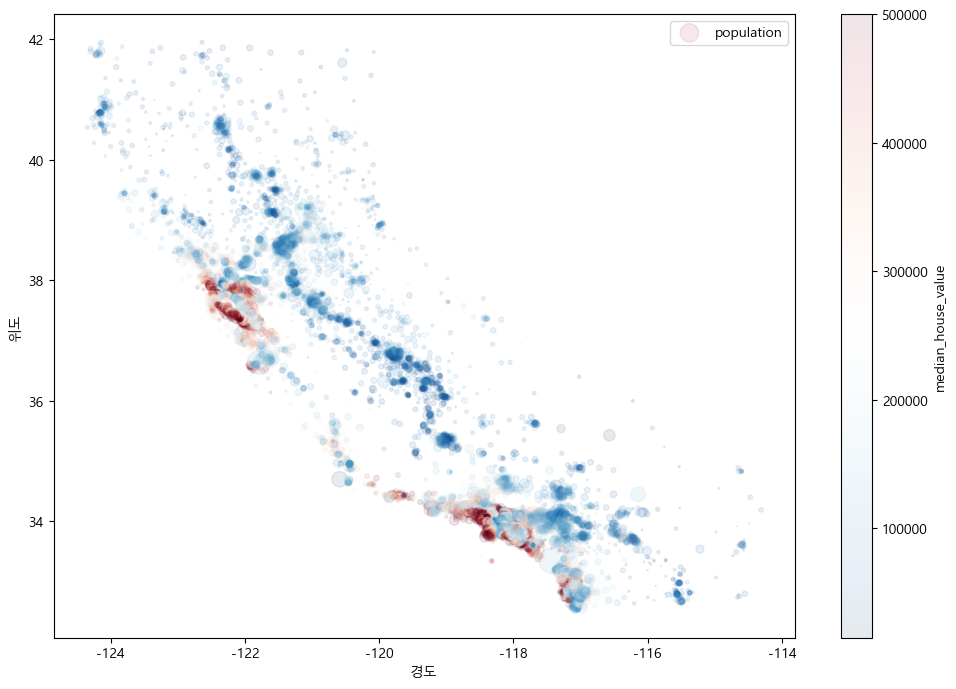

In [77]:
housing.plot(kind = 'scatter' , x = 'longitude',y = 'latitude', figsize = (10,7) , alpha = 0.1, s = housing['population']/100 , c = 'median_house_value' , cmap = 'RdBu_r' , colorbar = True , label = 'population')
plt.xlabel('경도')
plt.ylabel('위도')
plt.legend()
save_fig('housing_prices_scatter')


In [78]:
housing.fillna(housing.total_bedrooms.mean() , inplace = True)

In [79]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [80]:
one_hot = pd.get_dummies(housing['ocean_proximity'])
housing = pd.concat([housing , one_hot] , axis = 1)
housing.drop('ocean_proximity' , axis = 1 , inplace = True)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


In [81]:
x = housing.drop(['median_house_value'] , axis = 1)
y = housing['median_house_value']

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 42)


In [83]:
from sklearn.preprocessing import MinMaxScaler , StandardScaler
scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [86]:
from sklearn.metrics import mean_squared_error